In [78]:
# Import all the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import VotingClassifier
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score,roc_auc_score,precision_score, recall_score, f1_score,ConfusionMatrixDisplay,classification_report


import warnings
warnings.filterwarnings("ignore")

In [44]:
# Read the dataset
df = pd.read_csv("data.csv")
df.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


In [45]:
df.columns = df.columns.str.strip()

In [46]:
# check the shape of the dataset
df.shape

(6819, 96)

In [47]:
# check the datatype of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   Bankrupt?                                                6819 non-null   int64  
 1   ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2   ROA(A) before interest and % after tax                   6819 non-null   float64
 3   ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4   Operating Gross Margin                                   6819 non-null   float64
 5   Realized Sales Gross Margin                              6819 non-null   float64
 6   Operating Profit Rate                                    6819 non-null   float64
 7   Pre-tax net Interest Rate                                6819 non-null   float64
 8   After-tax net Interest Rate 

In [48]:
# Describe the dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Bankrupt?,6819.0,0.032263,0.176710,0.0,0.000000,0.000000,0.000000,1.0
ROA(C) before interest and depreciation before interest,6819.0,0.505180,0.060686,0.0,0.476527,0.502706,0.535563,1.0
ROA(A) before interest and % after tax,6819.0,0.558625,0.065620,0.0,0.535543,0.559802,0.589157,1.0
ROA(B) before interest and depreciation after tax,6819.0,0.553589,0.061595,0.0,0.527277,0.552278,0.584105,1.0
Operating Gross Margin,6819.0,0.607948,0.016934,0.0,0.600445,0.605997,0.613914,1.0
...,...,...,...,...,...,...,...,...
Liability to Equity,6819.0,0.280365,0.014463,0.0,0.276944,0.278778,0.281449,1.0
Degree of Financial Leverage (DFL),6819.0,0.027541,0.015668,0.0,0.026791,0.026808,0.026913,1.0
Interest Coverage Ratio (Interest expense to EBIT),6819.0,0.565358,0.013214,0.0,0.565158,0.565252,0.565725,1.0
Net Income Flag,6819.0,1.000000,0.000000,1.0,1.000000,1.000000,1.000000,1.0


In [49]:
# Check Is there any null value in the dataset
print("Number of columns with missing values:",df.isna().sum().sum())

Number of columns with missing values: 0


In [50]:
# Check Is there any duplicate value in the dataset
print("Number of duplicated records:",df.duplicated().sum())

Number of duplicated records: 0


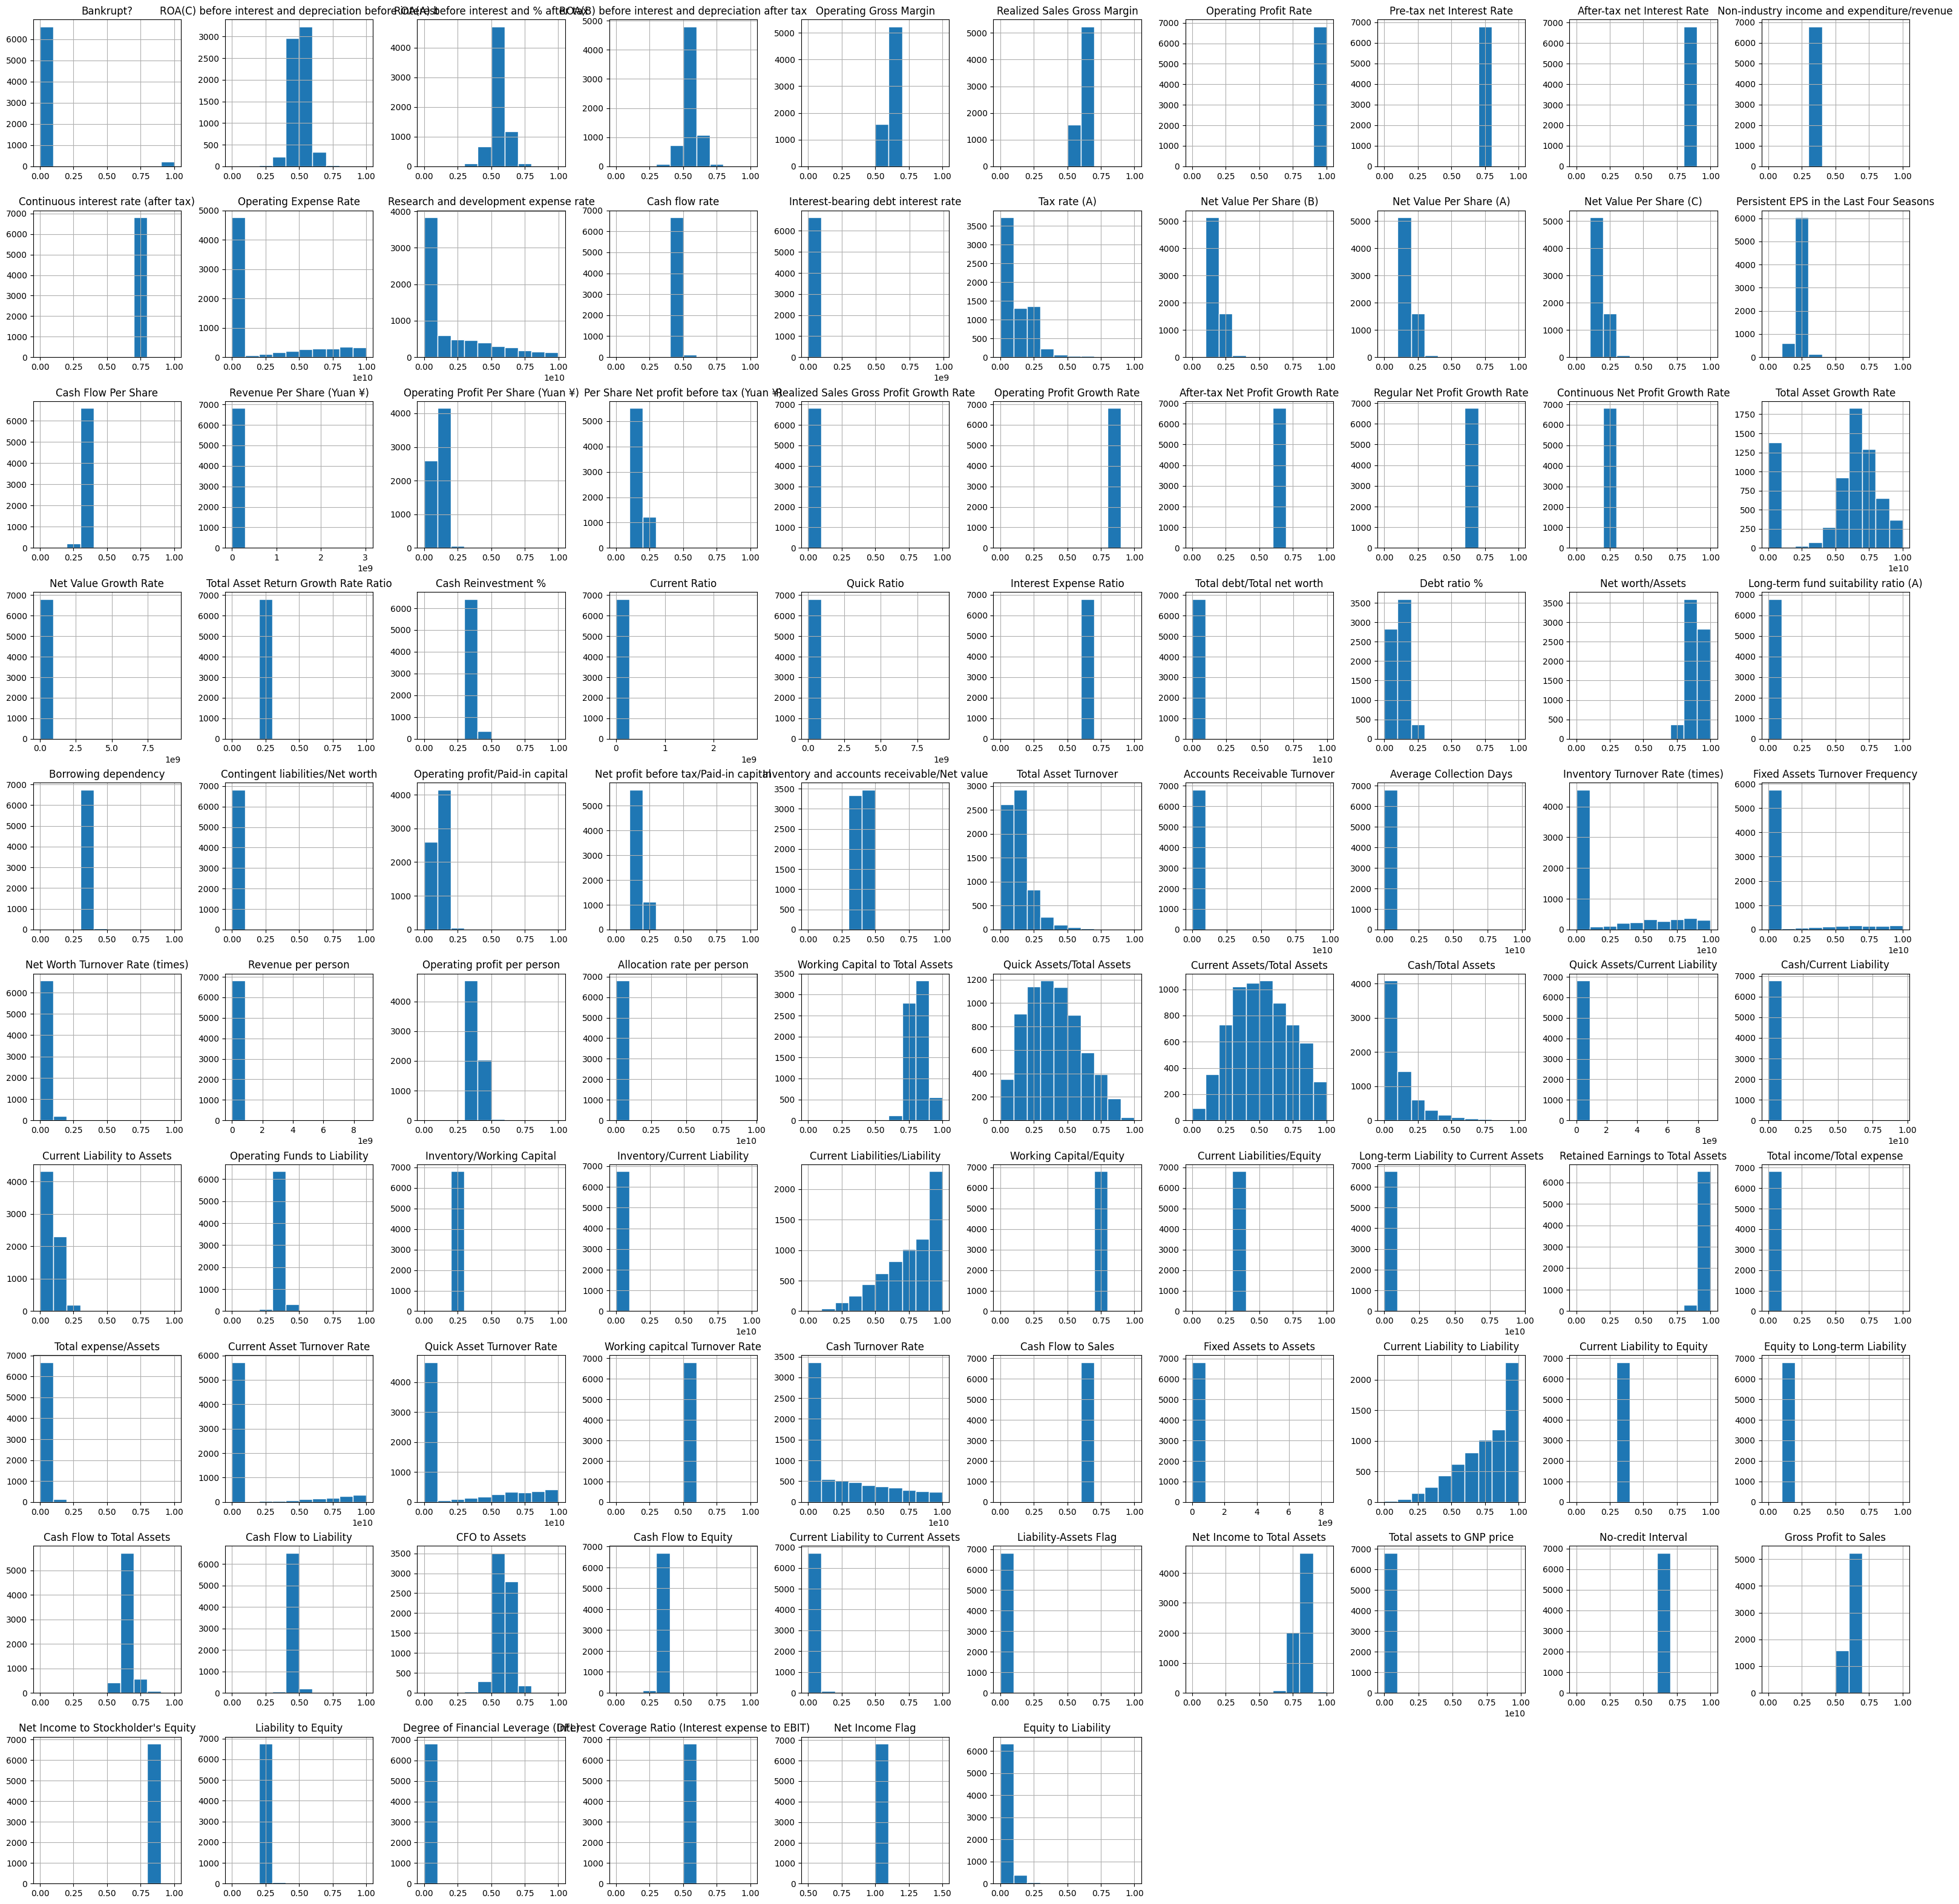

In [51]:
df.hist(figsize=(40,40), edgecolor='white')
plt.show()

* All the given features are numeric (int64 or float64)
* Column Net Income Flag and Liability-Assets Flag looks like a catogorical columns
* There is no missing values
* There is no duplicated values

**Categorical column distribution**

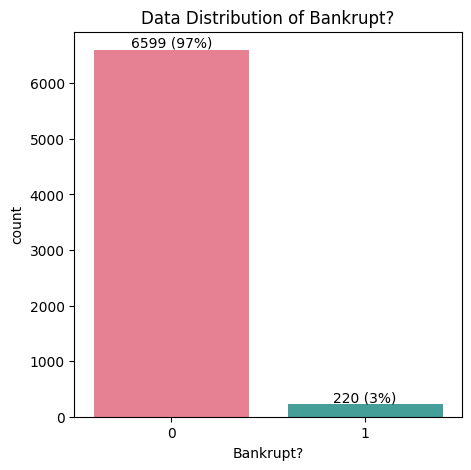

In [52]:
plt.figure(figsize=(5,5))
ax = sns.countplot(x=df["Bankrupt?"], palette="husl");

abs_values = df["Bankrupt?"].value_counts(ascending=False)
rel_values = df["Bankrupt?"].value_counts(ascending=False, normalize=True).values * 100
lbls = [f'{p[0]} ({p[1]:.0f}%)' for p in zip(abs_values, rel_values)]

ax.bar_label(container=ax.containers[0], labels=lbls)

plt.title("Data Distribution of Bankrupt?")
plt.show()

In [53]:
majority_class_samples=df["Bankrupt?"].loc[df["Bankrupt?"]==0]
minority_class_samples=df["Bankrupt?"].loc[df["Bankrupt?"]==1]
Imbalance_Ratio= len(majority_class_samples)/len(minority_class_samples)
print(f"Imbalance Ratio: {Imbalance_Ratio}")

Imbalance Ratio: 29.995454545454546


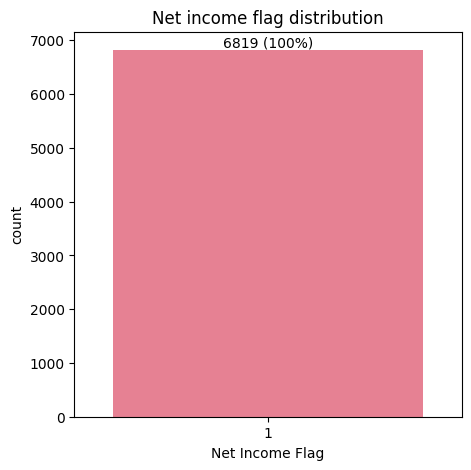

In [54]:
plt.figure(figsize=(5,5))
ax = sns.countplot(x=df["Net Income Flag"], palette="husl");

abs_values = df["Net Income Flag"].value_counts(ascending=False)
rel_values = df["Net Income Flag"].value_counts(ascending=False, normalize=True).values * 100
lbls = [f'{p[0]} ({p[1]:.0f}%)' for p in zip(abs_values, rel_values)]

ax.bar_label(container=ax.containers[0], labels=lbls)
plt.title("Net income flag distribution")
plt.show()

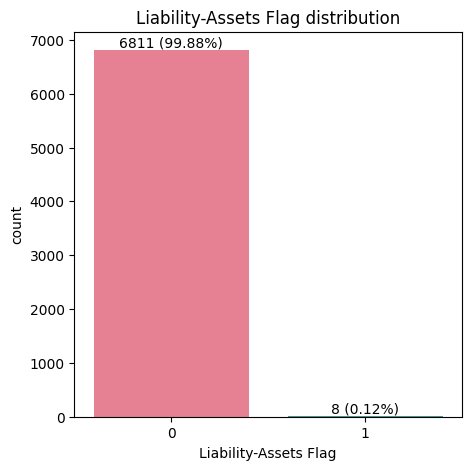

In [55]:
plt.figure(figsize=(5,5))
ax = sns.countplot(x=df["Liability-Assets Flag"], palette="husl");

abs_values = df["Liability-Assets Flag"].value_counts(ascending=False)
rel_values = df["Liability-Assets Flag"].value_counts(ascending=False, normalize=True).values * 100
lbls = [f'{p[0]} ({p[1]:.2f}%)' for p in zip(abs_values, rel_values)]

ax.bar_label(container=ax.containers[0], labels=lbls)
plt.title("Liability-Assets Flag distribution")
plt.show()


* Bankruptcy - This is our target variable, from the distribution we can observe the class imbalance (Needs to be treated before modelling)
* Net Income Flag - Activated for 100% companies, so this column can be removed
* Liability-Assets Flag - Activated for 0.12% companies of total dataset

In [56]:
df = df.drop("Net Income Flag", axis=1)

**Columns with Linear relationship with Target variable**

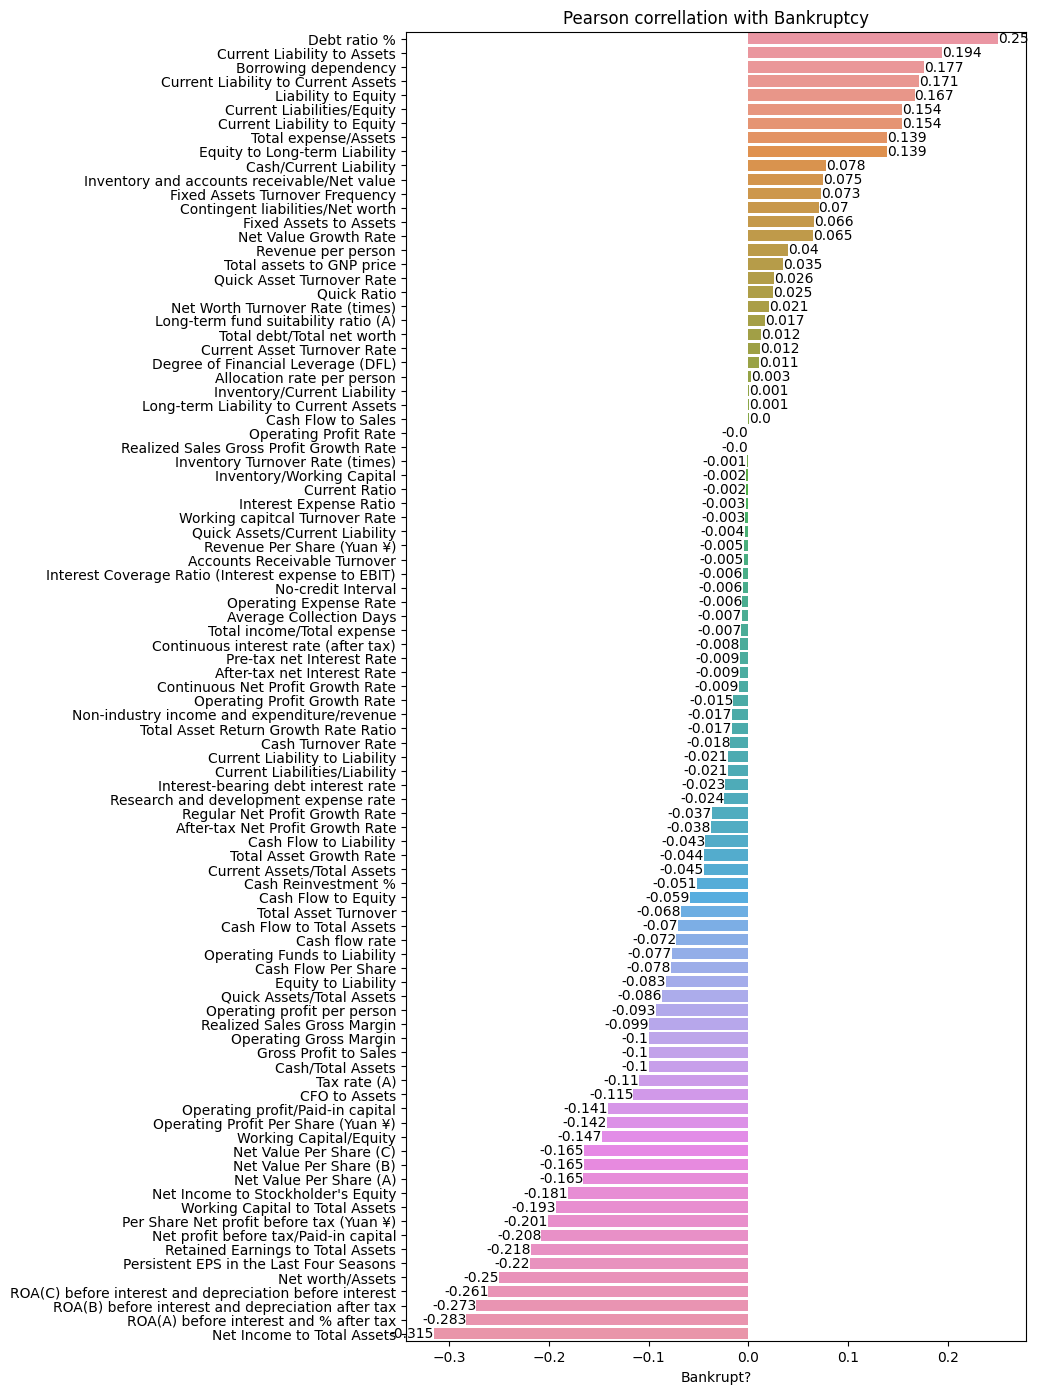

In [57]:
corr = pd.DataFrame(df.corr(numeric_only=True))
corr = pd.DataFrame(corr['Bankrupt?']).sort_values(ascending = False, by = 'Bankrupt?')

# Remove specific indices, all 3 are categorical
indices_to_remove = ['Liability-Assets Flag','Bankrupt?']
corr = corr.drop(indices_to_remove)

plt.figure(figsize=(8, 17))
ax = sns.barplot(y = corr.index, x = corr['Bankrupt?'])
ax.bar_label(container=ax.containers[0], labels=corr['Bankrupt?'].round(3))
plt.title("Pearson correllation with Bankruptcy")
plt.show()

In [58]:
# Lets see what features has weak correlation to strong correlation (>|0.10|)
temp_corr = corr
temp_corr[['Bankrupt?']] = abs(temp_corr[['Bankrupt?']])
print("Columns with correlation (>|0.05|):", len(temp_corr[(temp_corr["Bankrupt?"] > 0.05)].index))

Columns with correlation (>|0.05|): 48


In [59]:
numerical_cols = df
indices_to_remove = ['Liability-Assets Flag','Bankrupt?']
numerical_cols = numerical_cols.drop(indices_to_remove, axis=1).columns

In [60]:
def train_test_split_data(dataframe,target,test_size, random_state):
    x_train,x_test, y_train, y_test= train_test_split(dataframe.drop([target], axis=1),
                                                      dataframe[target],
                                                      test_size=test_size,
                                                      random_state=random_state,
                                                      stratify=dataframe[target]
                                                      )

    return x_train,x_test, y_train, y_test

In [61]:
x_train,x_test, y_train, y_test= train_test_split_data(df,target="Bankrupt?",test_size=0.3, random_state=42)

In [62]:
x_train.shape,x_test.shape, y_train.shape, y_test.shape

((4773, 94), (2046, 94), (4773,), (2046,))

In [63]:
def Winsorization_Method(columns, x_train, y_train , a, b):
    outliers=[]

    for col in columns:
        q1= np.percentile(x_train[col], a)
        q2= np.percentile(x_train[col],b)

        for pos in range(len(x_train)):
            if x_train[col].iloc[pos]>q2 or x_train[col].iloc[pos]<q1:
                outliers.append(pos)

    outliers= set(outliers)                   # remove the duplicates from the outliers
    outliers= list(outliers)

    ratio= round(len(outliers)/len(x_train)*100, 2)                       # Ratio of outliers
    x_train.drop(x_train.index[outliers], inplace=True)    # remove the outliers from the training dataset
    y_train.drop(y_train.index[outliers], inplace=True)



    return ratio, x_train, y_train

In [64]:
ratio, x_train, y_train= Winsorization_Method(numerical_cols, x_train, y_train,a=0.3,b=99.7)

In [65]:
print(f"Ratio of Outliers Detected in the dataset: {ratio}")

Ratio of Outliers Detected in the dataset: 19.86


In [66]:
# shape of data after removing the outliers in the training data
x_train.shape, y_train.shape

((3825, 94), (3825,))

In [67]:
scaler= RobustScaler()
x_train_processed= scaler.fit_transform(x_train)
x_test_processed=scaler.transform(x_test)

In [68]:
pca= PCA(n_components=70)
x_train_pca= pca.fit_transform(x_train_processed)
x_test_pca=pca.transform(x_test_processed)

In [69]:
x_train_pca.shape, y_train.shape, x_test_pca.shape, y_test.shape

((3825, 70), (3825,), (2046, 70), (2046,))

In [70]:
# Most important features
print(f"No. of Components Used: {pca.n_components_}")

No. of Components Used: 70


In [71]:
# The amount of variance explained by each of the selected components.
print(f"Variance:{pca.explained_variance_}")

Variance:[2.36523012e+26 1.21129854e+24 9.16918619e+22 2.36485435e+21
 1.67231325e+21 2.17817346e+20 1.82757369e+02 9.45011175e+01
 5.85878085e+01 2.64478032e+01 2.35781911e+01 1.94420531e+01
 1.64105013e+01 1.61745829e+01 1.36584598e+01 1.29128065e+01
 1.06698450e+01 1.03132626e+01 9.13805062e+00 7.15521774e+00
 6.36956927e+00 4.85895800e+00 4.26087289e+00 3.84888435e+00
 3.76187403e+00 3.11843344e+00 2.69982659e+00 2.24348303e+00
 2.06246196e+00 1.61867683e+00 1.53186549e+00 1.33468741e+00
 1.27088961e+00 1.16578221e+00 1.11320405e+00 9.46085787e-01
 8.56690198e-01 7.47744254e-01 6.42322823e-01 5.90426949e-01
 5.52295957e-01 5.41510309e-01 5.25242335e-01 5.03005104e-01
 4.71646159e-01 4.37957331e-01 4.05037291e-01 3.58777781e-01
 3.40284470e-01 3.08919599e-01 2.87601853e-01 2.69738666e-01
 2.57850927e-01 2.39089609e-01 2.18931682e-01 1.87790258e-01
 1.77381069e-01 1.39724701e-01 1.15107369e-01 1.12230432e-01
 1.01605445e-01 8.52917193e-02 7.56537426e-02 6.49914613e-02
 5.91127654e-02

In [72]:
# Percentage of variance explained by each of the selected components.
print(f"Variance_Ratio:{pca.explained_variance_ratio_}")

Variance_Ratio:[9.94503452e-01 5.09312210e-03 3.85534889e-04 9.94345454e-06
 7.03154118e-06 9.15852123e-07 7.68436158e-25 3.97346909e-25
 2.46342956e-25 1.11204535e-25 9.91387361e-26 8.17476016e-26
 6.90008981e-26 6.80089367e-26 5.74294455e-26 5.42942125e-26
 4.48632783e-26 4.33639635e-26 3.84225739e-26 3.00853971e-26
 2.67819971e-26 2.04303610e-26 1.79156048e-26 1.61833250e-26
 1.58174745e-26 1.31120131e-26 1.13519055e-26 9.43312705e-27
 8.67199147e-27 6.80601724e-27 6.44100340e-27 5.61193275e-27
 5.34368344e-27 4.90174051e-27 4.68066620e-27 3.97798749e-27
 3.60210769e-27 3.14402492e-27 2.70076159e-27 2.48255607e-27
 2.32222747e-27 2.27687728e-27 2.20847567e-27 2.11497523e-27
 1.98312092e-27 1.84147020e-27 1.70305198e-27 1.50854557e-27
 1.43078713e-27 1.29890789e-27 1.20927361e-27 1.13416463e-27
 1.08418050e-27 1.00529517e-27 9.20537550e-28 7.89597843e-28
 7.45830541e-28 5.87497581e-28 4.83989590e-28 4.71892994e-28
 4.27218330e-28 3.58624341e-28 3.18099739e-28 2.73268263e-28
 2.485502

In [73]:
smote= SMOTE(sampling_strategy='minority', random_state=43)
x_train_smote, y_train_smote= smote.fit_resample(x_train_pca, y_train)

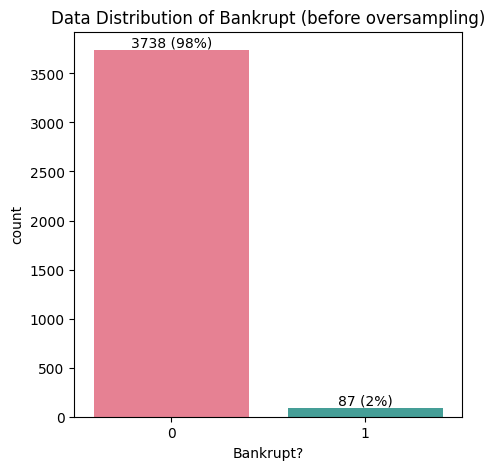

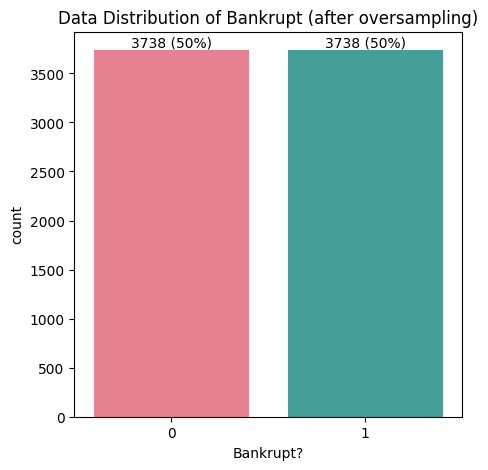

In [74]:
plt.figure(figsize=(5,5))
ax = sns.countplot(x=y_train, palette="husl");

abs_values = y_train.value_counts(ascending=False)
rel_values = y_train.value_counts(ascending=False, normalize=True).values * 100
lbls = [f'{p[0]} ({p[1]:.0f}%)' for p in zip(abs_values, rel_values)]

ax.bar_label(container=ax.containers[0], labels=lbls)

plt.title("Data Distribution of Bankrupt (before oversampling)")
plt.show()

plt.figure(figsize=(5,5))
ax = sns.countplot(x=y_train_smote, palette="husl");

abs_values = y_train_smote.value_counts(ascending=False)
rel_values = y_train_smote.value_counts(ascending=False, normalize=True).values * 100
lbls = [f'{p[0]} ({p[1]:.0f}%)' for p in zip(abs_values, rel_values)]

ax.bar_label(container=ax.containers[0], labels=lbls)

plt.title("Data Distribution of Bankrupt (after oversampling)")
plt.show()

Model		:RandomForestClassifier()
Accuracy	:99.72
Recall		:0.6
Precision	:0.09090909090909091
F1-Score	:0.15789473684210525
Best Estimator	:RandomForestClassifier(max_features=1, min_samples_split=3, n_estimators=300)


Classifiaction Report
--------------------------------------------------------
              precision    recall  f1-score   support

           0      0.971     0.998     0.984      1980
           1      0.600     0.091     0.158        66

    accuracy                          0.969      2046
   macro avg      0.785     0.544     0.571      2046
weighted avg      0.959     0.969     0.957      2046


Confusion Matrix
---------------------------------------------------------------------


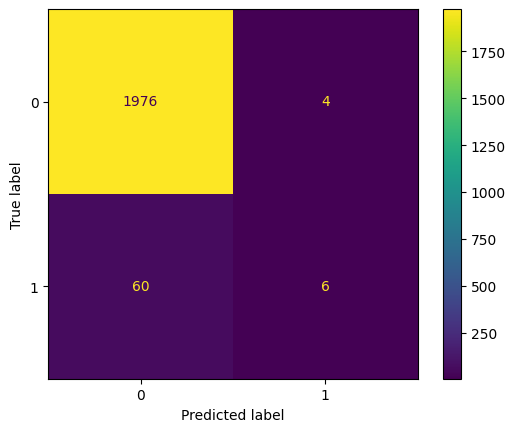

In [75]:
rf_param_grid = {"max_features": [1,3,10],
                  "min_samples_split":[2,3,10],
                  "min_samples_leaf":[1,3,10],
                  "n_estimators":[100,300],
                  "criterion":["gini"]}

model= GridSearchCV(RandomForestClassifier(), rf_param_grid, cv=5, scoring ="accuracy", n_jobs = -1)
model.fit(x_train_smote, y_train_smote)
y_pred= model.predict(x_test_pca)

cv_result = model.best_score_
recall_scores = recall_score(y_pred, y_test)
precision_scores = precision_score(y_pred, y_test)
f1_scores = f1_score(y_pred, y_test)
best_estimators = model.best_estimator_

print(f"Model\t\t:{RandomForestClassifier()}")
print(f"Accuracy\t:{round(cv_result*100,2)}")
print(f"Recall\t\t:{recall_scores}")
print(f"Precision\t:{precision_scores}")
print(f"F1-Score\t:{f1_scores}")
print(f"Best Estimator\t:{model.best_estimator_}")
print("\n\nClassifiaction Report")
print("--------------------------------------------------------")
print(classification_report(y_test,y_pred,digits=3))
print("\nConfusion Matrix")
print("---------------------------------------------------------------------")
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

model_name = ['RandomForestClassifier']
result_df1 = pd.DataFrame({'Recall':recall_scores, 'Precision':precision_scores, 'F1_Score':f1_scores, 'Accuracy': cv_result,},index=model_name)
result_df1 = result_df1.sort_values(by="Accuracy", ascending=False)

Model		:GradientBoostingClassifier()
Accuracy	:98.89
Recall		:0.22950819672131148
Precision	:0.21212121212121213
F1-Score	:0.2204724409448819
Best Estimator	:GradientBoostingClassifier(learning_rate=0.2, min_samples_leaf=10,
                           min_samples_split=3)


Classifiaction Report
--------------------------------------------------------
              precision    recall  f1-score   support

           0      0.974     0.976     0.975      1980
           1      0.230     0.212     0.220        66

    accuracy                          0.952      2046
   macro avg      0.602     0.594     0.598      2046
weighted avg      0.950     0.952     0.951      2046


Confusion Matrix
---------------------------------------------------------------------


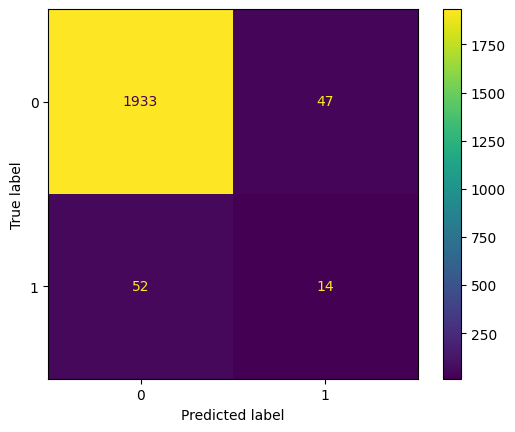

In [79]:
gbc_param_grid = {"learning_rate": [0.05, 0.1, 0.2],
                  "min_samples_split": [2,3,10],
                  "min_samples_leaf": [1,3,10]}

model= GridSearchCV(GradientBoostingClassifier(), gbc_param_grid, cv=5, scoring ="accuracy", n_jobs = -1)
model.fit(x_train_smote, y_train_smote)
y_pred= model.predict(x_test_pca)

cv_result = model.best_score_
recall_scores = recall_score(y_pred, y_test)
precision_scores = precision_score(y_pred, y_test)
f1_scores = f1_score(y_pred, y_test)
best_estimators = model.best_estimator_

print(f"Model\t\t:{GradientBoostingClassifier()}")
print(f"Accuracy\t:{round(cv_result*100,2)}")
print(f"Recall\t\t:{recall_scores}")
print(f"Precision\t:{precision_scores}")
print(f"F1-Score\t:{f1_scores}")
print(f"Best Estimator\t:{model.best_estimator_}")
print("\n\nClassifiaction Report")
print("--------------------------------------------------------")
print(classification_report(y_test,y_pred,digits=3))
print("\nConfusion Matrix")
print("---------------------------------------------------------------------")
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

model_name = ['GradientBoostingClassifier']
result_df2 = pd.DataFrame({'Recall':recall_scores, 'Precision':precision_scores, 'F1_Score':f1_scores, 'Accuracy': cv_result,},index=model_name)
result_df2 = result_df2.sort_values(by="Accuracy", ascending=False)

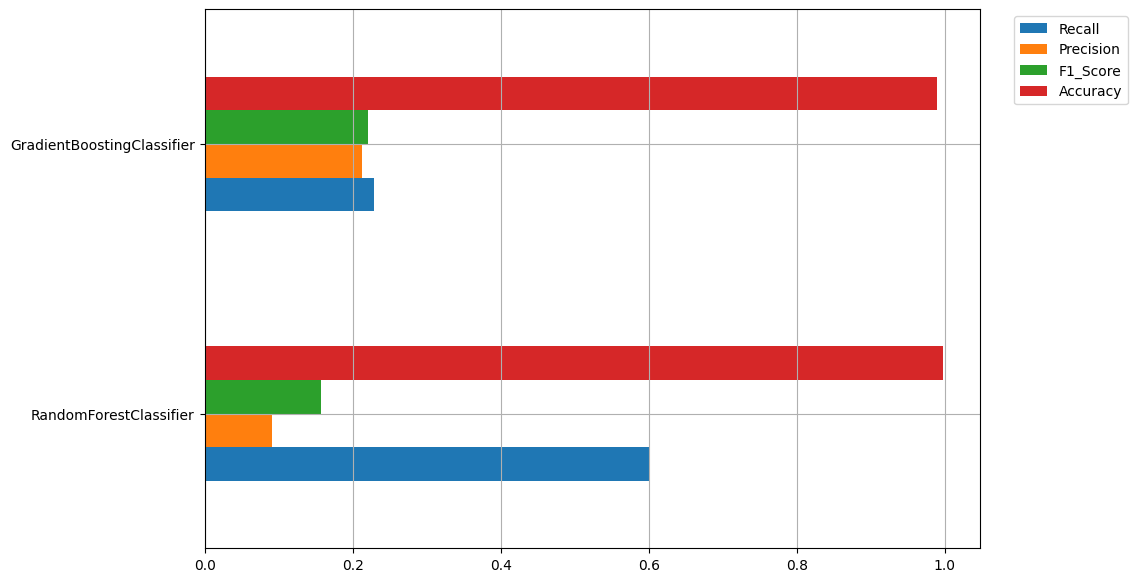

In [80]:
result_df = result_df1.append(result_df2)
result_df.plot(kind="barh", figsize=(10, 7), grid=True).legend(bbox_to_anchor=(1.2,1));